In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/고유경/Desktop/대외활동/투빅스/과제/1주차/Auction_master_kr/Auction_master_train.csv")

# 전처리(Pre-processing)

In [3]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [4]:
df.shape

(1933, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

## 1. 결측값 처리

In [6]:
# 결측치 있는 열 확인
df.isnull().sum(axis=0)

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

#### (1번 문제) 결측값이 있는 모든 열을 없애주세요

In [7]:
#df = df.dropna(axis=1)
df.dropna(axis=1, inplace=True)
df.shape

(1933, 35)

In [8]:
#데이터프레임 모든 열 전부 보기
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
df

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,N,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,N,해운대해변로,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,N,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,N,마린시티2로,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,N,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,N,모라로110번길,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,N,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,N,황령대로319번가길,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,N,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,N,오작로,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,강제,일반,280000000,삼창감정,2017-02-16 00:00:00,1,0,66419.3,40.55,40.55,84.87,84.87,401000000,401000000,2017-06-19 00:00:00,2017-06-19 00:00:00,낙찰,Private,서울,도봉구,창동,N,삼성 110동 15층 1501호,아파트,1992-08-29 00:00:00,21,15,N,노해로66길,2017-08-30 00:00:00,배당,37.648810,127.048683,402500000
1929,1295,임의,일반,200000000,삼상감정,2015-02-21 00:00:00,2,1,20433.8,39.60,39.60,114.81,114.81,454000000,363200000,2017-02-13 00:00:00,2017-03-13 00:00:00,낙찰,중소기업은행,서울,노원구,상계동,N,상계불암대림 205동 23층 2303호,아파트,2000-05-30 00:00:00,23,23,N,덕릉로94길,2017-05-24 00:00:00,배당,37.663291,127.077063,430234600
1930,254,임의,일반,354805459,서초감정,2016-10-21 00:00:00,2,1,7460.8,19.03,19.03,133.98,133.98,1285000000,1028000000,2017-12-21 00:00:00,2018-01-18 00:00:00,낙찰,우리은행,서울,중구,회현동1가,N,",회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호",주상복합,2011-12-13 00:00:00,32,19,N,소공로,2018-03-29 00:00:00,배당,37.558319,126.981994,1118999990
1931,1486,강제,일반,80000000,한미감정,2016-06-17 00:00:00,2,1,16875.8,42.20,42.20,84.94,84.94,407000000,325600000,2016-10-10 00:00:00,2016-11-14 00:00:00,낙찰,Private,서울,도봉구,쌍문동,N,삼성래미안 110동 11층 1102호,아파트,2002-11-07 00:00:00,15,11,N,우이천로,2017-01-24 00:00:00,배당,37.647061,127.028002,403000000


## 2. 시각화

#### (2번문제) 모든 연속형 변수 간의 상관관계를 Heatmap을 통해 확인해 주세요

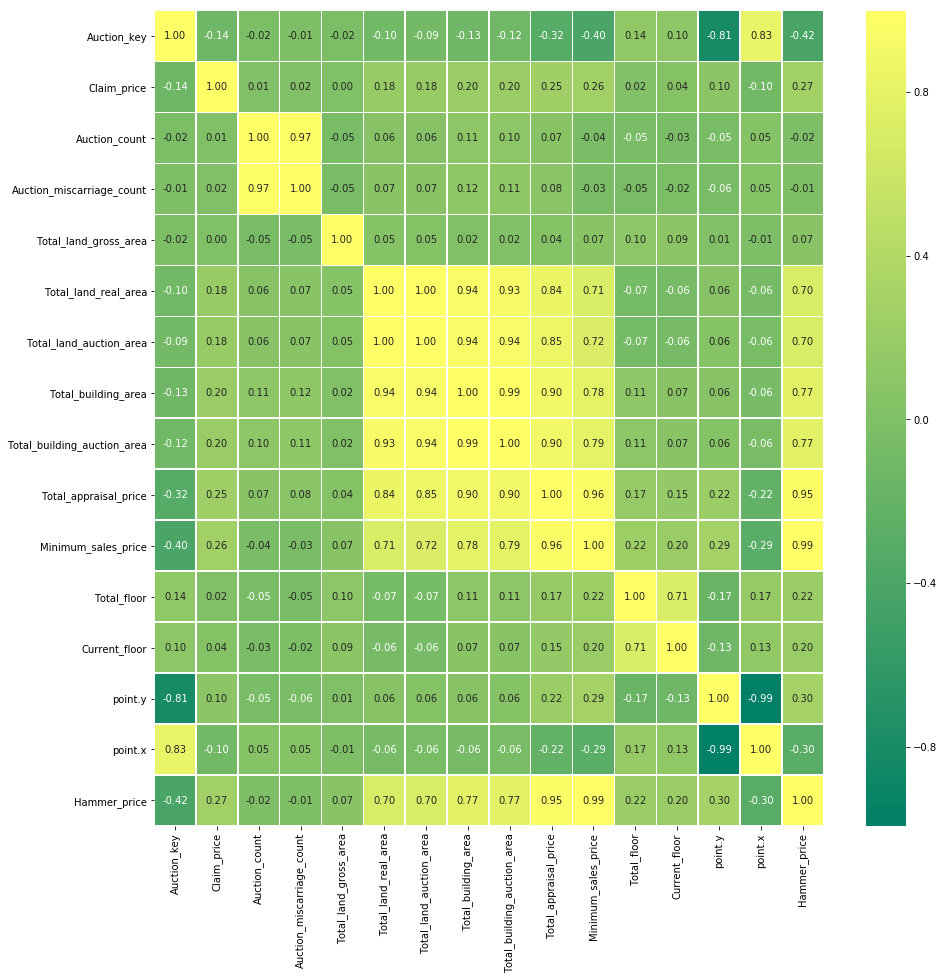

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot= True, fmt='.2f', linewidths=.5, cmap='summer')
plt.show()

#### (3번 문제) 모든 연속형 변수의 분포를 Histogram으로 확인해 주세요

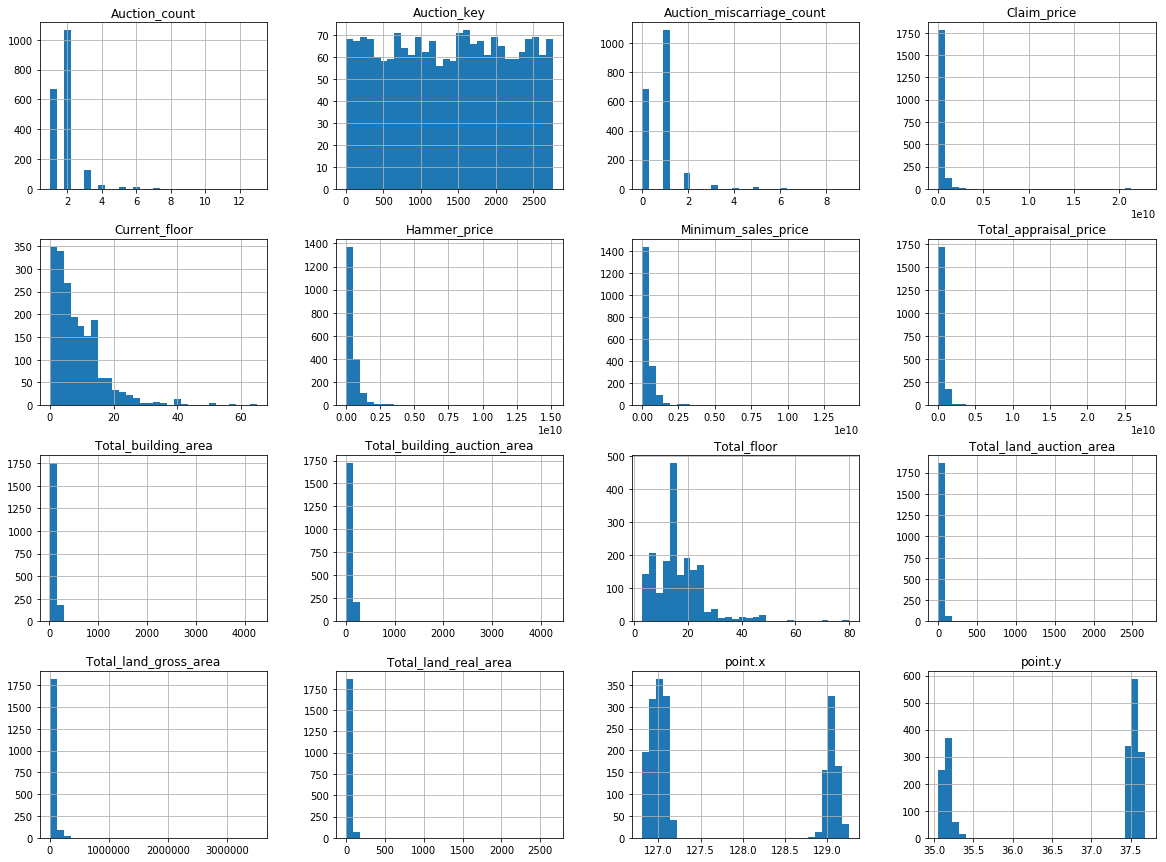

In [10]:
df.hist(bins=30,figsize=(20,15))
plt.show()

In [11]:
#시간포함되어있는 날짜변수들 날짜형변수로 바꿔주기
datelist= ['Appraisal_date','First_auction_date','Final_auction_date','Preserve_regist_date','Close_date']
for date in datelist:
    df[date]=pd.to_datetime(df[date],errors='coerce')
    
df

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,부산,해운대구,우동,N,해운대엑소디움 5층 101-502호,주상복합,2009-07-14,45,5,N,해운대해변로,2018-06-14,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,부산,해운대구,우동,N,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16,70,51,N,마린시티2로,2017-03-30,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28,2017-10-13,낙찰,국민은행,부산,사상구,모라동,N,백양그린 206동 14층 1403호,아파트,1992-07-31,15,14,N,모라로110번길,2017-12-13,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,부산,남구,대연동,N,대연청구 109동 11층 1102호,아파트,2001-07-13,20,11,N,황령대로319번가길,2017-12-27,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06,2016-08-03,낙찰,Private,부산,사하구,괴정동,N,동조리젠시 7층 703호,아파트,2001-11-27,7,7,N,오작로,2016-10-04,배당,35.099630,128.998874,158660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,강제,일반,280000000,삼창감정,2017-02-16,1,0,66419.3,40.55,40.55,84.87,84.87,401000000,401000000,2017-06-19,2017-06-19,낙찰,Private,서울,도봉구,창동,N,삼성 110동 15층 1501호,아파트,1992-08-29,21,15,N,노해로66길,2017-08-30,배당,37.648810,127.048683,402500000
1929,1295,임의,일반,200000000,삼상감정,2015-02-21,2,1,20433.8,39.60,39.60,114.81,114.81,454000000,363200000,2017-02-13,2017-03-13,낙찰,중소기업은행,서울,노원구,상계동,N,상계불암대림 205동 23층 2303호,아파트,2000-05-30,23,23,N,덕릉로94길,2017-05-24,배당,37.663291,127.077063,430234600
1930,254,임의,일반,354805459,서초감정,2016-10-21,2,1,7460.8,19.03,19.03,133.98,133.98,1285000000,1028000000,2017-12-21,2018-01-18,낙찰,우리은행,서울,중구,회현동1가,N,",회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호",주상복합,2011-12-13,32,19,N,소공로,2018-03-29,배당,37.558319,126.981994,1118999990
1931,1486,강제,일반,80000000,한미감정,2016-06-17,2,1,16875.8,42.20,42.20,84.94,84.94,407000000,325600000,2016-10-10,2016-11-14,낙찰,Private,서울,도봉구,쌍문동,N,삼성래미안 110동 11층 1102호,아파트,2002-11-07,15,11,N,우이천로,2017-01-24,배당,37.647061,127.028002,403000000


In [12]:
#회장님 코드를 참고한 로그변환함수
def log_distribution(x):
    f,ax=plt.subplots(1,2)
    
    x.hist(ax=ax[0],color='black')
    ax[0].set_title(x.name + ' 변환 전')
    #로그변환
    np.log(x).hist(ax=ax[1],color='green')
    ax[1].set_title(x.name + ' 변환 후')
    plt.show()

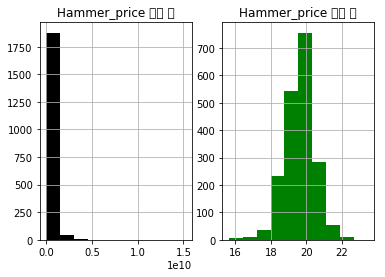

In [13]:
#타겟변수인 hammer_price 로그변환
log_distribution(df['Hammer_price'])

In [14]:
#타겟변수인 hammer_price와 상관관계 높은 변수들 나열
df.corr()['Hammer_price'].sort_values(ascending=False)

Hammer_price                   1.000000
Minimum_sales_price            0.994592
Total_appraisal_price          0.953464
Total_building_auction_area    0.772839
Total_building_area            0.768454
Total_land_auction_area        0.700639
Total_land_real_area           0.696099
point.y                        0.295698
Claim_price                    0.267728
Total_floor                    0.220830
Current_floor                  0.198013
Total_land_gross_area          0.070466
Auction_miscarriage_count     -0.011296
Auction_count                 -0.016999
point.x                       -0.296312
Auction_key                   -0.418769
Name: Hammer_price, dtype: float64

비슷한 종류의 변수인 price를 제외하고 타겟변수와 높은 상관성을 지닌 면적(area) 변수 확인

여러 갈래를 나누어서 면적 위주로 데이터 시각화해보기

In [15]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

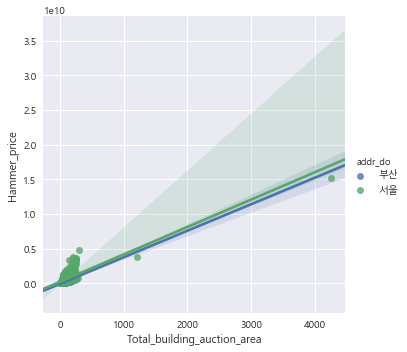

In [16]:
#서울,부산 총건물경매면적 대비 낙찰가 분포 비교
#타겟변수 낙찰가와 상관계수 높은 (0.772839) 총건물경매면적 변수
sns.lmplot(x='Total_building_auction_area',y='Hammer_price',hue='addr_do',data=df)

이상치 때문에 시각화의 어려움 -> query 활용하여 면적 범위 축소지정

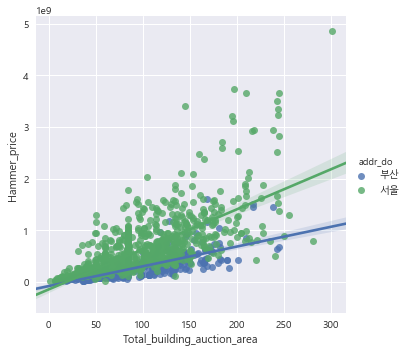

In [17]:
df_1 = df.query('Total_building_auction_area<1000')
sns.lmplot(x='Total_building_auction_area',y='Hammer_price',hue='addr_do',data=df_1)
plt.show()

훨씬 깔끔한 그래프, 서울이 부산보다 면적 대비 낙찰가 상승폭 큼

이걸 바탕으로 좀 더 세부적으로 살펴보자

### 1) 건물종류 별 면적 대비 낙찰가 분포

In [18]:
#건물종류 확인
df['Apartment_usage'].unique()

array(['주상복합', '아파트'], dtype=object)

In [19]:
#각 개수 확인
df['Apartment_usage'].value_counts()

아파트     1656
주상복합     277
Name: Apartment_usage, dtype: int64

아파트 비중이 훨씬 큼

In [20]:
#주상복합, 아파트별 데이터프레임 새로 생성
multi = df.groupby('Apartment_usage').get_group('주상복합')
multi = multi.reset_index(drop=True)
apart = df.groupby('Apartment_usage').get_group('아파트')
apart = apart.reset_index(drop=True)

In [21]:
#위와 마찬가지로 query로 범위 축소해주기
multi_1 = multi.query('Total_building_auction_area<1000')
apart_1 = apart.query('Total_building_auction_area<1000')

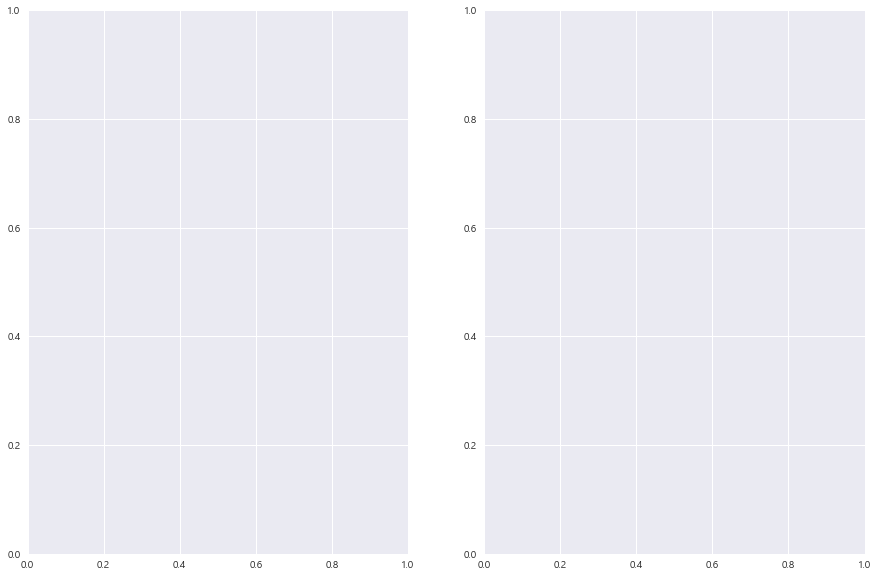

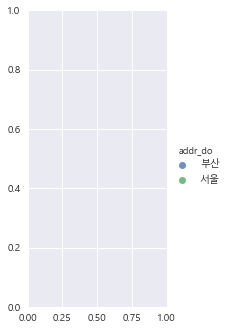

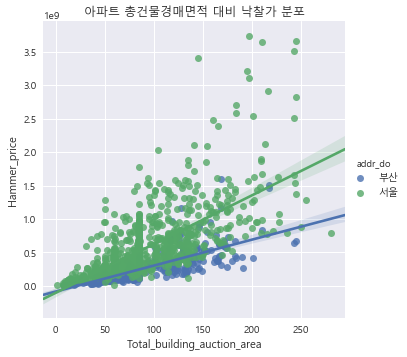

In [23]:
f,ax=plt.subplots(1,2,figsize = (15,10))

#1번플롯(주상복합)
ax[0] = plt.subplot(1,2,1)
ax[0] = sns.lmplot(x='Total_building_auction_area',y='Hammer_price',hue='addr_do',data=multi_1)
ax[0] = plt.title('주상복합 총건물경매면적 대비 낙찰가 분포')


#2번플롯(아파트)
ax[1] = plt.subplot(1,2,2)
ax[1] = sns.lmplot(x='Total_building_auction_area',y='Hammer_price',hue='addr_do',data=apart_1)
ax[1] = plt.title('아파트 총건물경매면적 대비 낙찰가 분포')


plt.show()

오류뜸 -> 원인: subplot은 lmplot을 지원하지 않는다.


lmplot들은 따로 따로 나타내기

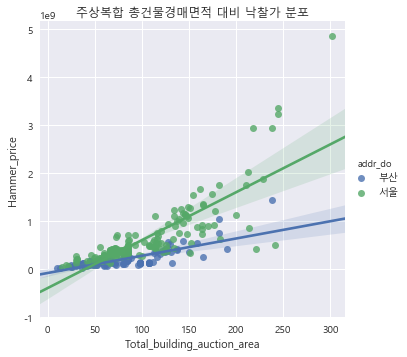

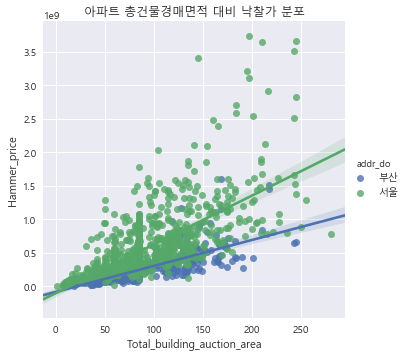

In [24]:
#주상복합 plot
sns.lmplot(x='Total_building_auction_area',y='Hammer_price',hue='addr_do',data=multi_1)
plt.title('주상복합 총건물경매면적 대비 낙찰가 분포')
plt.show()

#아파트 plot
sns.lmplot(x='Total_building_auction_area',y='Hammer_price',hue='addr_do',data=apart_1)
plt.title('아파트 총건물경매면적 대비 낙찰가 분포')
plt.show()

### 2) 서울, 부산 지역구별 낙찰가 분포

In [25]:
#부산,서울 각각의 데이터프레임 생성
busan = df.groupby('addr_do').get_group('부산')
busan = busan.reset_index(drop=True)
seoul = df.groupby('addr_do').get_group('서울')
seoul = seoul.reset_index(drop=True)

In [26]:
#낙찰가 최소, 최댓값 지정
M = max(df.Hammer_price)
m = min(df.Hammer_price)

In [27]:
M #최댓값

15151000000

In [28]:
m #최솟값

6303000

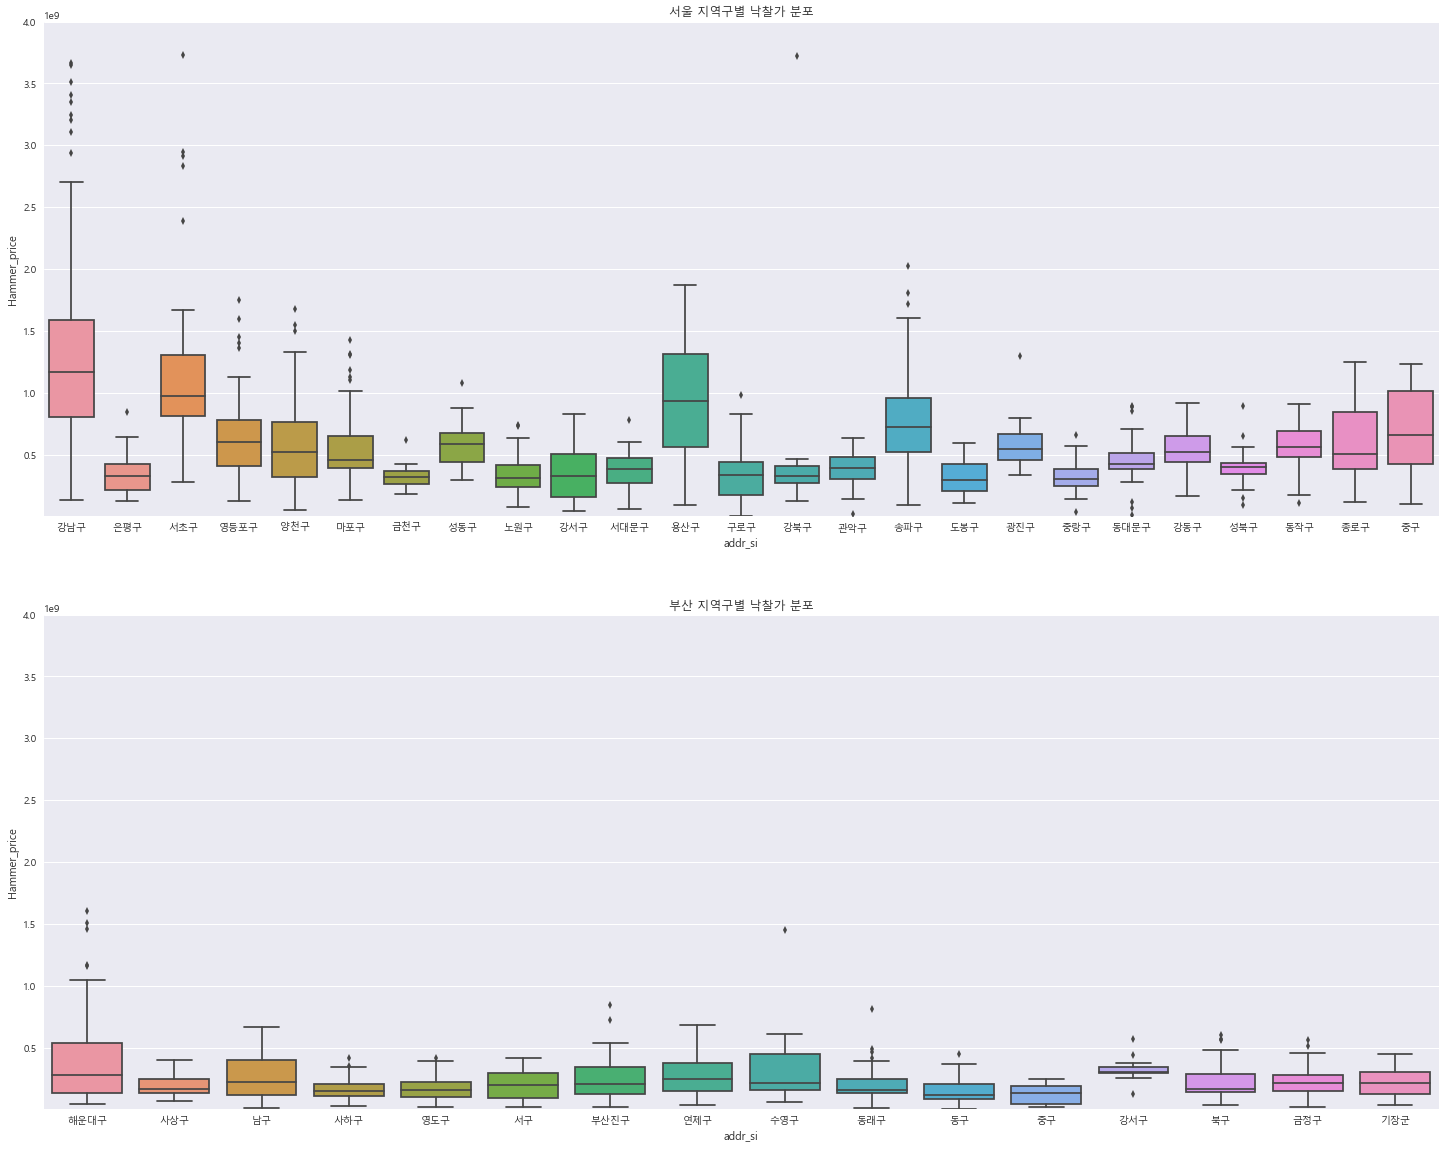

In [29]:
f,ax=plt.subplots(2,1,figsize = (25,20))

#1번플롯(서울)
ax[0] = plt.subplot(2,1,1)
ax[0] = sns.boxplot(x="addr_si", y="Hammer_price", data=seoul)
ax[0].set_ylim(m,4000000000) #y축통일
ax[0] = plt.title('서울 지역구별 낙찰가 분포')


#2번플롯(부산)
ax[1] = plt.subplot(2,1,2)
ax[1] = sns.boxplot(x="addr_si", y="Hammer_price", data=busan)
ax[1].set_ylim(m,4000000000) #y축통일
ax[1] = plt.title('부산 지역구별 낙찰가 분포')
#ax[1] = plt.figure(figsize=(10,10))


plt.show()

### 3) 최초,최종경매일에 따른 낙찰가 분포

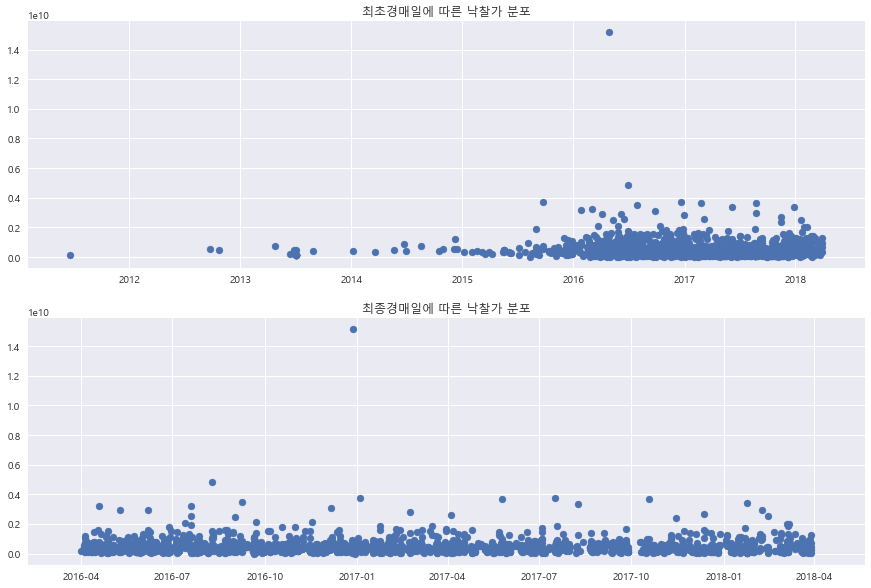

In [30]:
f,ax=plt.subplots(2,1,figsize = (15,10))

#1번플롯(최초경매일)
ax[0] = plt.subplot(2,1,1)
ax[0] = plt.scatter(x=df['First_auction_date'],y=df['Hammer_price'])
ax[0] = plt.title('최초경매일에 따른 낙찰가 분포')


#2번플롯(최종경매일)
ax[1] = plt.subplot(2,1,2)
ax[1] = plt.scatter(x=df['Final_auction_date'],y=df['Hammer_price'])
ax[1] = plt.title('최종경매일에 따른 낙찰가 분포')


plt.show()

이상치 때문에 시각화 어려움 -> query로 변수 범위 조정

In [31]:
#낙찰가 범위 지정
df_2 = df.query('Hammer_price < 6000000000')

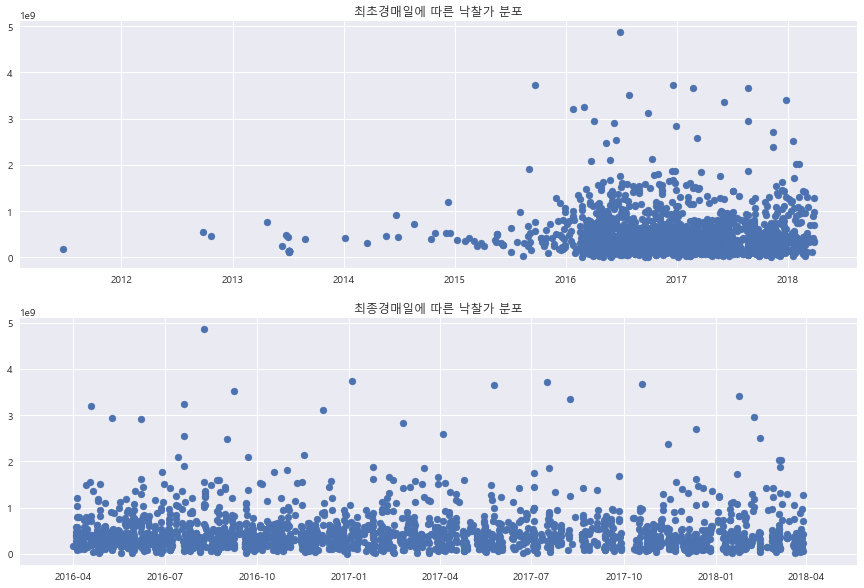

In [32]:
f,ax=plt.subplots(2,1,figsize = (15,10))

#1번플롯(최초경매일)
ax[0] = plt.subplot(2,1,1)
ax[0] = plt.scatter(x=df_2['First_auction_date'],y=df_2['Hammer_price'])
ax[0] = plt.title('최초경매일에 따른 낙찰가 분포')


#2번플롯(최종경매일)
ax[1] = plt.subplot(2,1,2)
ax[1] = plt.scatter(x=df_2['Final_auction_date'],y=df_2['Hammer_price'])
ax[1] = plt.title('최종경매일에 따른 낙찰가 분포')


plt.show()

### 4) 총층수, 해당층수 히스토그램

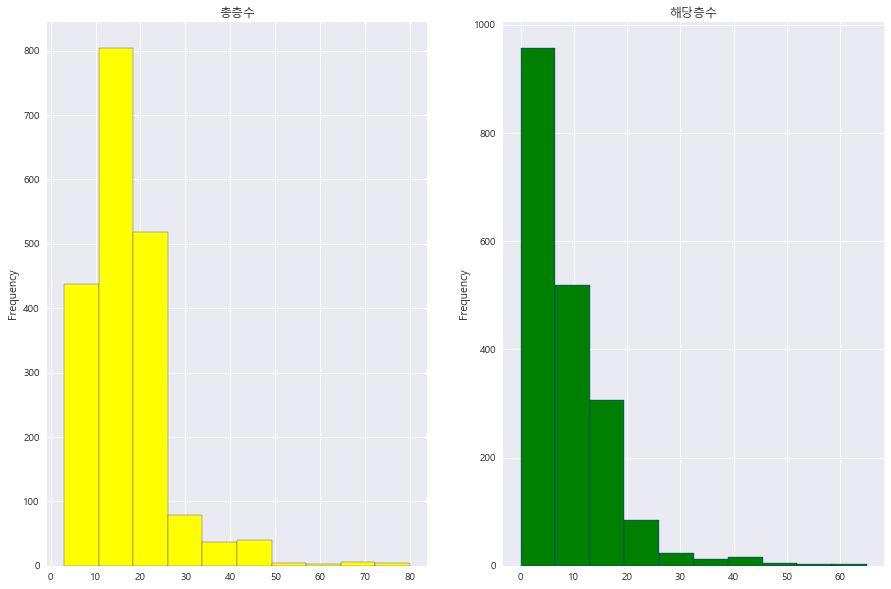

In [34]:
f,ax=plt.subplots(1,2,figsize = (15,10))

#1번플롯(총층수)
ax[0] = plt.subplot(1,2,1)
ax[0] = df['Total_floor'].plot.hist(bins=10,color='yellow',edgecolor = 'blue')
ax[0] = plt.title('총층수')


#2번플롯(해당층수)
ax[1] = plt.subplot(1,2,2)
ax[1] = df['Current_floor'].plot.hist(bins=10,color='green',edgecolor = 'blue')
ax[1] = plt.title('해당층수')


plt.show()

고층보다 비교적 저층건물의 수가 많다

### 5) 총층수,해당층수 대비 낙찰가 분포

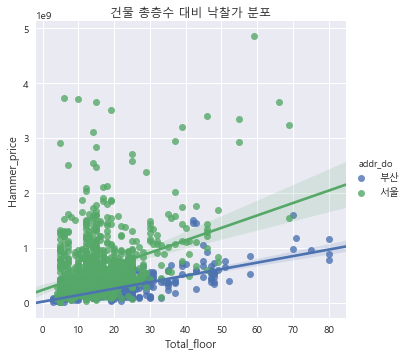

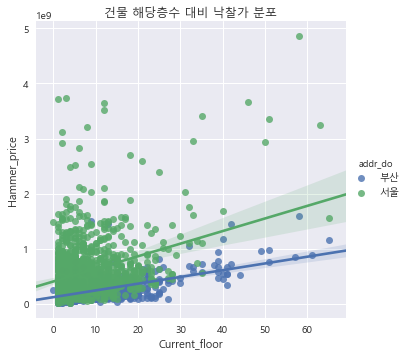

In [35]:
#총층수
sns.lmplot(x='Total_floor',y='Hammer_price',hue='addr_do',data=df_2)
plt.title('건물 총층수 대비 낙찰가 분포')
plt.show()

#해당층수
sns.lmplot(x='Current_floor',y='Hammer_price',hue='addr_do',data=df_2)
plt.title('건물 해당층수 대비 낙찰가 분포')
plt.show()

## 3. 변수생성

In [36]:
#새로운 10개의 feature를 추가할 뉴 데이터프레임을 생성하자
new_df = df
new_df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,부산,해운대구,우동,N,해운대엑소디움 5층 101-502호,주상복합,2009-07-14,45,5,N,해운대해변로,2018-06-14,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,부산,해운대구,우동,N,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16,70,51,N,마린시티2로,2017-03-30,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28,2017-10-13,낙찰,국민은행,부산,사상구,모라동,N,백양그린 206동 14층 1403호,아파트,1992-07-31,15,14,N,모라로110번길,2017-12-13,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,부산,남구,대연동,N,대연청구 109동 11층 1102호,아파트,2001-07-13,20,11,N,황령대로319번가길,2017-12-27,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06,2016-08-03,낙찰,Private,부산,사하구,괴정동,N,동조리젠시 7층 703호,아파트,2001-11-27,7,7,N,오작로,2016-10-04,배당,35.099630,128.998874,158660000


### 1) 감정분기(Appraisal_quarter)
감정일을 분기별로 나누어 단순화하기 위한 변수(년도 무관)


같은 문법으로 최초&최종경매일,종국일자 등을 분기별로 단순화하여 나타낸다면 의미있는 인사이트를 뽑아낼 수 있을 것이라 생각

In [37]:
#감정일 컬럼에서 월 부분만 추출
new_df['Appraisal_quarter'] = new_df['Appraisal_date'].apply(lambda x: x.month)

In [38]:
new_df.Appraisal_quarter

0        7
1        9
2       11
3       12
4        3
        ..
1928     2
1929     2
1930    10
1931     6
1932     4
Name: Appraisal_quarter, Length: 1933, dtype: int64

In [39]:
#dictionary로 월별 분기 지정(함수로 만들어도 될듯하나 다양한 방법을 활용하고 싶어서 이 부분은 딕셔너리로 했습니다)
date_to_quarter = { 1:'1분기', 2:'1분기', 3:'1분기', 4:'2분기', 5:'2분기', 6:'2분기', 7:'3분기', 8:'3분기', 9:'3분기', 10:'4분기', 11:'4분기', 12:'4분기'}

In [40]:
#제대로 뱉어내나 확인
date_to_quarter[12]

'4분기'

In [41]:
#apply, lambda활용하여 감정일->감정분기로 변환해주는 새로운 열 생성
date_to_quarter = { 1:'1분기', 2:'1분기', 3:'1분기', 4:'2분기', 5:'2분기', 6:'2분기', 7:'3분기', 8:'3분기', 9:'3분기', 10:'4분기', 11:'4분기', 12:'4분기'}
new_df['Appraisal_quarter'] = new_df['Appraisal_quarter'].apply(lambda x: date_to_quarter[x])

In [42]:
#확인
new_df['Appraisal_quarter']

0       3분기
1       3분기
2       4분기
3       4분기
4       1분기
       ... 
1928    1분기
1929    1분기
1930    4분기
1931    2분기
1932    2분기
Name: Appraisal_quarter, Length: 1933, dtype: object

### 2) 경매기간 (Auction_period)
최종경매일 - 최초경매일

In [43]:
new_df['Auction_period'] = new_df['Final_auction_date'] - new_df['First_auction_date']

In [44]:
new_df['Auction_period']

0       35 days
1       35 days
2       77 days
3      105 days
4       28 days
         ...   
1928     0 days
1929    28 days
1930    28 days
1931    35 days
1932    35 days
Name: Auction_period, Length: 1933, dtype: timedelta64[ns]

### 3) 건물나이 (building_age)
감정일자(Appraisal_date) - 보존등기일(Preserve_regist_date)

정확히 어떤 일자를 가지고 건물나이를 계산하기보다는 큰 폭에서 년도수만 추출하여 나이 계산

In [45]:
#apply, lambda 활용하여 년도만 추출해서 빼기
new_df['building_age'] = new_df['Appraisal_date'].apply(lambda x: x.year) - new_df['Preserve_regist_date'].apply(lambda x: x.year)
new_df['building_age']

0        8.0
1        5.0
2       24.0
3       15.0
4       15.0
        ... 
1928    25.0
1929    15.0
1930     5.0
1931    14.0
1932     2.0
Name: building_age, Length: 1933, dtype: float64

### 4) 연면적 (Total_floor_area)
건축물의 총 바닥면적 합계


바닥면적(총건물면적: Total_building_area) * 층수(Total_floor)

In [46]:
new_df['Total_floor_area'] = new_df['Total_building_area'] * new_df['Total_floor']
new_df['Total_floor_area']

0       8179.65
1       8286.60
2        749.10
3       1698.20
4        594.72
         ...   
1928    1782.27
1929    2640.63
1930    4287.36
1931    1274.10
1932    2264.24
Name: Total_floor_area, Length: 1933, dtype: float64

### 5) 건폐율 (building_to_land_ratio)
건축물이 토지를 덮고 있는 비율

건축면적(총건물면적: Total_building_area) / 대지면적(총토지전체면적: Total_land_gross_area) * 100


In [47]:
new_df['building_to_land_ratio'] = new_df['Total_building_area']/new_df['Total_land_gross_area']*100
new_df['building_to_land_ratio']

0        1.443536
1        0.278685
2        0.033364
3        0.347921
4       10.976744
          ...    
1928     0.127779
1929     0.561863
1930     1.795786
1931     0.503324
1932     0.317095
Name: building_to_land_ratio, Length: 1933, dtype: float64

### 6) 용적률 (Floor_area_ratio)
대지면적에 대한 건축물의 연면적 비율

건축물의 연면적 / 대지면적(총토지전체면적) * 100

In [48]:
new_df['Floor_area_ratio'] = new_df['Total_floor_area'] / new_df['Total_land_gross_area'] * 100
new_df['Floor_area_ratio']

0       64.959101
1       19.507935
2        0.500457
3        6.958410
4       76.837209
          ...    
1928     2.683362
1929    12.922853
1930    57.465151
1931     7.549864
1932     6.976101
Name: Floor_area_ratio, Length: 1933, dtype: float64

### 7) 채권자종류 (Type_creditor)


creditor변수를 살펴보니 상당히 많은 금융권과 회사 종류 -> 제1,2,3금융권,기타로 단순화하여 새로운 변수 생성

In [49]:
#creditor은 채권자,경매신청인
len(df['Creditor'].unique())

448

In [50]:
df['Creditor'].unique()

array(['베리타스자산관리대부', '흥국저축은행', '국민은행', '고려저축은행', 'Private', '서울보증보험',
       '천마(새)', '대형선망수협', '디에이치대부', '코카콜라음료', '한화저축은행', '프라임대부', '대부F&D',
       'HK저축은행', '부산은행', '농협은행', '청룡동(새)', '케이에이제7차유동화전문', '신용보증기금',
       '반야월농협', '제이티캐피탈', '오케이캐피탈대부', '우리은행', '대구은행', '삼성카드', '영진건설',
       '한화손해보험', '하나은행', '유진대부금융', '동부화재해상보험', '비에스금융대부', '(주)티베이',
       '범일5동(새)', '기술보증기금', '중소기업은행', '신한카드', '해운대신협', '승학(새)', '승학신협',
       '두산건설', '동래농협', '농협생명보험', '한국주택금융공사', '현대캐피탈', 'NH농협캐피탈', '신한생명보험',
       '동부산농협', '경북대구낙농협', '부영벽산아파트입주자대표회의', '한국씨티은행', 'KB국민카드', '디지비캐피탈',
       '베스트피플대부', '세종상호저축은행', '경남은행', '북부산(새)', '한국무역보험공사', '스카이저축은행',
       '에이치에스제일차유동화전문', '영우유통', '명륜동(새)', '구서2동(새)', '남천천신협', '부곡동(새)',
       '한화생명보험', '영남자원', '비엔케이캐피탈', '대양석유(주)', '부산주례(새)', '대청(새)',
       '중부(새)', '기술신용보증기금', '범일동(새)', '경산농협', '국제저축은행', '그랜드코리아레저',
       '부산동부신협', '신한은행', '웰릭스에프앤아이대부', '대구태영신협', '부산평화(새)', '진주서부농협',
       '감천1동(새)', '제1,2구잠수기수협', '농소농협', 'SC은행', '진해수협', '서1동(새)', '현대모비스',
    

In [51]:
#Na값으로 이루어진 열 생성
new_df['Type_creditor'] = np.nan

In [52]:
#제1금융권
new_df['Type_creditor'][df.Creditor.str.contains("은행")] = "제1금융권"

#제2금융권
new_df['Type_creditor'][df.Creditor.str.contains("저축")] = "제2금융권"
new_df['Type_creditor'][df.Creditor.str.contains("신협")] = "제2금융권"
new_df['Type_creditor'][df.Creditor.str.contains("농협")] = "제2금융권"
new_df['Type_creditor'][df.Creditor.str.contains("농협은행")] = "제1금융권" #특수경우 제외시키기
new_df['Type_creditor'][df.Creditor.str.contains("수협")] = "제2금융권"
new_df['Type_creditor'][df.Creditor.str.contains("축협")] = "제2금융권"
new_df['Type_creditor'][df.Creditor.str.contains("보험")] = "제2금융권"
new_df['Type_creditor'][df.Creditor.str.contains("카드")] = "제2금융권"
new_df['Type_creditor'][df.Creditor.str.contains("캐피탈")] = "제2금융권"

#제3금융권
new_df['Type_creditor'][df.Creditor.str.contains("대부")] = "제3금융권"

#Private(기존에 공개되지 않은 값들이라 그대로 유지)
new_df['Type_creditor'][df.Creditor.str.contains("Private")] = "Private"


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [53]:
#분류안된 나머지 변수들은 기타로 묶기
new_df['Type_creditor'].fillna("기타", inplace=True)

In [54]:
new_df['Type_creditor'].isnull().sum()

0

결측값없는것 확인

In [55]:
new_df.loc[:,['Type_creditor']]

,Type_creditor
0,제3금융권
1,제2금융권
2,제1금융권
3,제2금융권
4,Private
...,...
1928,Private
1929,제1금융권
1930,제1금융권
1931,Private


### 8) 건물층수(New_total_floor)
건물층수와 현재층수 히스토그램으로 시각화한 결과 압도적으로 높은 30층미만 건물수 -> 층별로 그룹을 지어놓는다면 효율적인 분석이 가능할 것

10층 미만 : 저층 / 10~19층 : 10 / 20~29층 : 20 / 30~39층 : 30 / 40층 이상 : 고층

In [56]:
#층 구분짓는 함수 생성
def fun(x):
    if x < 10:
        return "저층"
    elif x >= 10 and x < 20:
        return "10"
    elif x >= 20 and x < 30:
        return "20"
    elif x >= 30 and x < 40:
        return "30"
    elif x >= 40:
        return "고층"

In [57]:
#함수 적용한 column 생성
new_df['New_total_floor'] = new_df['Total_floor'].apply(lambda x: fun(x))

In [58]:
new_df['New_total_floor']

0       고층
1       고층
2       10
3       20
4       저층
        ..
1928    20
1929    20
1930    30
1931    10
1932    20
Name: New_total_floor, Length: 1933, dtype: object

In [59]:
new_df['New_total_floor'].value_counts()

10    921
20    490
저층    390
30     68
고층     64
Name: New_total_floor, dtype: int64

### 9) 경매층수높이(Current_total_ratio)
현재층수(Current_floor) / 총층수(Total_floor)


매물의 현재 층수가 해당 건물에서 어느정도의 높이에 해당하는지 보기 위한 변수 

In [60]:
new_df['Current_total_ratio'] = new_df['Current_floor']/new_df['Total_floor']

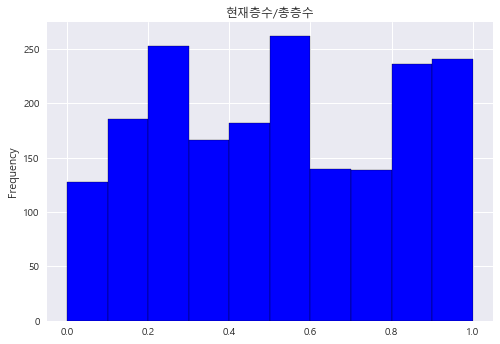

In [63]:
new_df['Current_total_ratio'].plot.hist(bins=10,color='blue',edgecolor='black')
plt.title('현재층수/총층수')
plt.show()

### 10) 통합주소 (Addr)
도시, 구, 동, 상세주소별로 나누어져있는 열을 하나로 통합하여 새로운 열 생성

In [64]:
new_df['Addr'] = new_df['addr_do'] + ' ' + new_df['addr_si']+ ' ' + new_df['addr_dong']+ ' ' + new_df['addr_etc'] 

In [65]:
new_df['Addr']

0                       부산 해운대구 우동 해운대엑소디움 5층 101-502호
1                부산 해운대구 우동 해운대두산위브더제니스 103동 51층 5103호
2                       부산 사상구 모라동 백양그린 206동 14층 1403호
3                        부산 남구 대연동 대연청구 109동 11층 1102호
4                             부산 사하구 괴정동 동조리젠시 7층 703호
                             ...                      
1928                       서울 도봉구 창동 삼성 110동 15층 1501호
1929                  서울 노원구 상계동 상계불암대림 205동 23층 2303호
1930    서울 중구 회현동1가 ,회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호
1931                   서울 도봉구 쌍문동 삼성래미안 110동 11층 1102호
1932                    서울 강서구 가양동 강서한강자이 106동 7층 703호
Name: Addr, Length: 1933, dtype: object

## 10개의 변수가 추가된 New Dataframe

In [66]:
new_df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price,Appraisal_quarter,Auction_period,building_age,Total_floor_area,building_to_land_ratio,Floor_area_ratio,Type_creditor,New_total_floor,Current_total_ratio,Addr
0,2687,임의,개별,1766037301,정명감정,2017-07-26,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,부산,해운대구,우동,N,해운대엑소디움 5층 101-502호,주상복합,2009-07-14,45,5,N,해운대해변로,2018-06-14,배당,35.162717,129.137048,760000000,3분기,35 days,8.0,8179.65,1.443536,64.959101,제3금융권,고층,0.111111,부산 해운대구 우동 해운대엑소디움 5층 101-502호
1,2577,임의,일반,152946867,희감정,2016-09-12,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,부산,해운대구,우동,N,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16,70,51,N,마린시티2로,2017-03-30,배당,35.156633,129.145068,971889999,3분기,35 days,5.0,8286.60,0.278685,19.507935,제2금융권,고층,0.728571,부산 해운대구 우동 해운대두산위브더제니스 103동 51층 5103호
2,2197,임의,개별,11326510,혜림감정,2016-11-22,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28,2017-10-13,낙찰,국민은행,부산,사상구,모라동,N,백양그린 206동 14층 1403호,아파트,1992-07-31,15,14,N,모라로110번길,2017-12-13,배당,35.184601,128.996765,93399999,4분기,77 days,24.0,749.10,0.033364,0.500457,제1금융권,10,0.933333,부산 사상구 모라동 백양그린 206동 14층 1403호
3,2642,임의,일반,183581724,신라감정,2016-12-13,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,부산,남구,대연동,N,대연청구 109동 11층 1102호,아파트,2001-07-13,20,11,N,황령대로319번가길,2017-12-27,배당,35.154180,129.089081,256899000,4분기,105 days,15.0,1698.20,0.347921,6.958410,제2금융권,20,0.550000,부산 남구 대연동 대연청구 109동 11층 1102호
4,1958,강제,일반,45887671,나라감정,2016-03-07,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06,2016-08-03,낙찰,Private,부산,사하구,괴정동,N,동조리젠시 7층 703호,아파트,2001-11-27,7,7,N,오작로,2016-10-04,배당,35.099630,128.998874,158660000,1분기,28 days,15.0,594.72,10.976744,76.837209,Private,저층,1.000000,부산 사하구 괴정동 동조리젠시 7층 703호


In [67]:
new_df.shape

(1933, 45)

In [68]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 45 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null datetime64[ns]
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null datetime64[ns]
Final_auction_date             1933 non-null d

끝입니당~